<a href="https://colab.research.google.com/github/DavydenkoGr/Lab-Work/blob/dev/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://hh.ru/oauth/authorize'

params = {
    "response_type": "code",
    "client_id": 152964417
}

data = requests.get(URL, params)

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
pass

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
# Dictionary with vacancies by profession
professions = {
    "data scientist": [],
    "backend developer": [],
    "frontend developer": [],
    "product manager": [],
    "English tutor": []
}

for profession in professions.keys():

    params = {
        "text": profession,
        "area": 1,
        "page": 0
    }

    pages_count = requests.get(URL, params).json()["pages"]

    for page in range(pages_count):
        sleep(0.1)

        params["page"] = page
        data = requests.get(URL, params).json()

        professions[profession] += data["items"]

# First 3 vacancies for every profession
for profession in professions.keys():
    print(professions[profession][:3])

[{'id': '80253990', 'premium': False, 'name': 'Data scientist (intern)', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Варшавское шоссе', 'building': '9', 'lat': 55.700486, 'lng': 37.621678, 'description': None, 'raw': 'Москва, Варшавское шоссе, 9', 'metro': None, 'metro_stations': [], 'id': '12794791'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2023-05-13T16:23:06+0300', 'created_at': '2023-05-13T16:23:06+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=80253990', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/80253990?host=hh.ru', 'adv_response_url': None, 'alternate_url': 'https://hh.ru/vacancy/80253990', 'relations': [], 'employer': {'id': '3823903', 'name': 'Aramco Innovations', 'url': 'h

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
sum([len(professions[profession]) for profession in professions.keys()])

5988

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, coords):
        self.name = name
        self.coords = coords

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = dict()
for profession in professions.keys():
    for vacancy in professions[profession]:
        name = vacancy["employer"]["name"]
        if name in companies.keys():
            continue

        name = vacancy["employer"]["name"]
        coords = (None, None)
        if vacancy["address"] != None:
            coords = (vacancy["address"]["lat"], vacancy["address"]["lng"])

        companies[name] = Company(name, coords)

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
count = 0
for company in companies.values():
    count += company.coords != (None, None)
count

1059

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [3]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 156MB/s]


Создадим DataFrame:

In [16]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_mask = diamonds["total_sales_price"] == diamonds["total_sales_price"].max()
min_mask = diamonds["total_sales_price"] == diamonds["total_sales_price"].min()

# Trying to match output format
print(diamonds[max_mask].values[0][0], "-", diamonds[max_mask].values[0][-1])
print(diamonds[min_mask].values[0][0], "-", diamonds[min_mask].values[0][-1])

219703 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
count = 0
columns = list()
for column in diamonds:
    null_mask = ((diamonds[column] == "None") | (diamonds[column] == "unknown"))
    height = diamonds[null_mask].shape[0]

    if height != 0:
        columns.append(column)

    count += height

count

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
columns

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
additional_columns = list()

for column in diamonds:
    if column.startswith("fluor_") or column.startswith("fancy_color_"):
        additional_columns.append(diamonds[column])

len(additional_columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
count = 0

for series in additional_columns:
    not_null_mask = ((series != "None") & (series != "unknown"))
    count += series[not_null_mask].shape[0]

count

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
for series in additional_columns:
    del diamonds[series.name]

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
for column in diamonds:
    if column.startswith("culet_"):
        del diamonds[column]

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds["total_sales_price"].sum() / 1000 # + vault price / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
# wow
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
columns = list()
for column, series in diamonds.items():
    if series.dtype == "object":
        columns.append(column)

diamonds[columns]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [17]:
%matplotlib inline

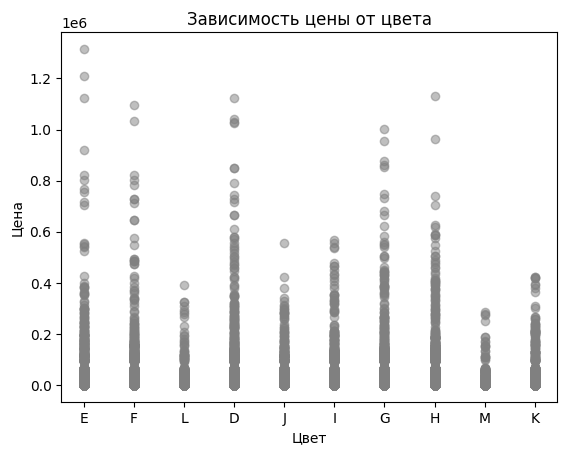

In [45]:
color_mask = diamonds["color"] != "unknown"
color_price_df = diamonds[["color", "total_sales_price"]][color_mask]

plt.scatter(
    color_price_df["color"],
    color_price_df["total_sales_price"],
    color="grey",
    alpha=0.5
)

plt.title("Зависимость цены от цвета")
plt.xlabel("Цвет")
plt.ylabel("Цена")

plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

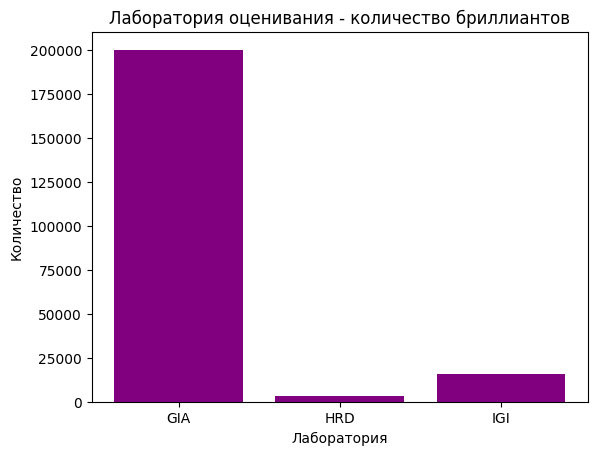

In [64]:
lab_group = diamonds.groupby("lab").size()

plt.bar(
    lab_group.index,
    lab_group,
    color="purple"
)

plt.title("Лаборатория оценивания - количество бриллиантов")
plt.xlabel("Лаборатория")
plt.ylabel("Количество")

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

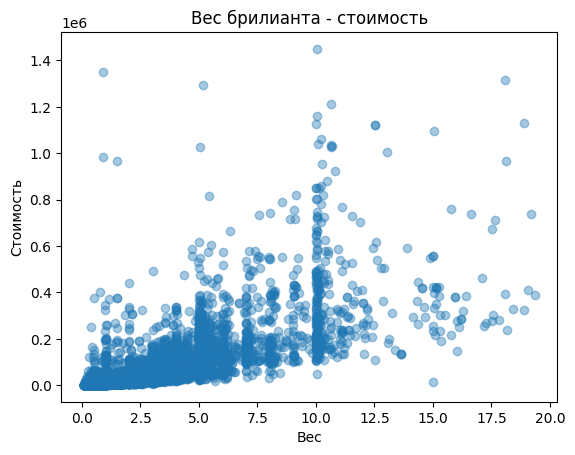

In [67]:
plt.scatter(
    diamonds["carat_weight"],
    diamonds["total_sales_price"],
    alpha=0.4
)

plt.title("Вес брилианта - стоимость")
plt.xlabel("Вес")
plt.ylabel("Стоимость")

plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

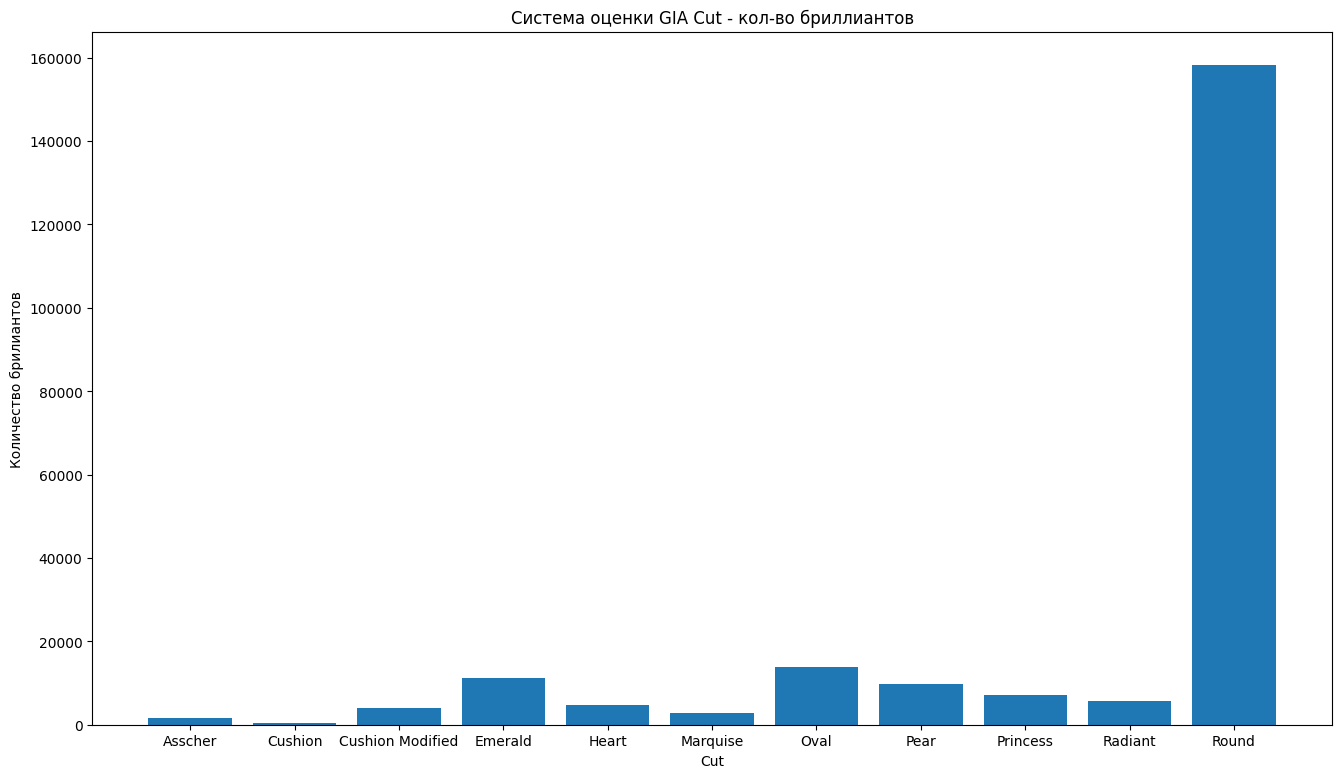

In [73]:
cut_group = diamonds.groupby("cut").size()

plt.figure(figsize=(16, 9))

plt.bar(
    cut_group.index,
    cut_group,
    
)

plt.title("Система оценки GIA Cut - кол-во бриллиантов")
plt.xlabel("Cut")
plt.ylabel("Количество брилиантов")

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Наиболее ценятся круглые бриллианты около 10 карат. Зависимость цвета от цены слабая, практически не наблюдается. В основном оценкой бриллиантов занимается лаборатория GIA.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [4]:
diamonds_data = pd.read_csv("diamonds.csv")[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
diamonds_data

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
...,...,...,...,...
219698,14.06,14.18,8.66,1210692
219699,11.55,8.81,5.71,1292500
219700,17.06,17.10,10.20,1315496
219701,5.22,4.90,3.47,1350000


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [5]:
diamonds_data = diamonds_data.sample(frac=1).reset_index(drop=True)
diamonds_data

,meas_length,meas_width,meas_depth,total_sales_price
0,4.31,4.34,2.72,1120
1,4.50,4.53,2.75,1014
2,3.71,3.73,2.25,584
3,5.42,5.46,3.40,3804
4,5.01,5.06,3.16,2260
...,...,...,...,...
219698,6.78,8.16,4.60,9956
219699,4.52,4.54,2.84,1180
219700,5.08,5.11,3.17,2770
219701,4.31,4.35,2.66,936


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [6]:
metrics = (
    abs(diamonds_data["meas_length"] - diamonds_data["meas_width"]) ** 3 +
    abs(diamonds_data["meas_width"] - diamonds_data["meas_depth"]) ** 3 +
    abs(diamonds_data["meas_depth"] - diamonds_data["meas_length"]) ** 3
) ** (1 / 3)
metrics

0         2.022352
1         2.223923
2         1.852170
3         2.570489
4         2.362779
            ...   
219698    3.873240
219699    2.129342
219700    2.425497
219701    2.104375
219702    2.141940
Length: 219703, dtype: float64

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [7]:
frame = {
    "metrics": metrics,
    "price": diamonds_data["total_sales_price"]
}
sample = pd.DataFrame(frame)
sample

,metrics,price
0,2.022352,1120
1,2.223923,1014
2,1.852170,584
3,2.570489,3804
4,2.362779,2260
...,...,...
219698,3.873240,9956
219699,2.129342,1180
219700,2.425497,2770
219701,2.104375,936


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [20]:
height = sample.shape[0]
# 2/10
test_sample = sample[:int(height / 5)]
# 8/10
training_sample = sample[int(height / 5):]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

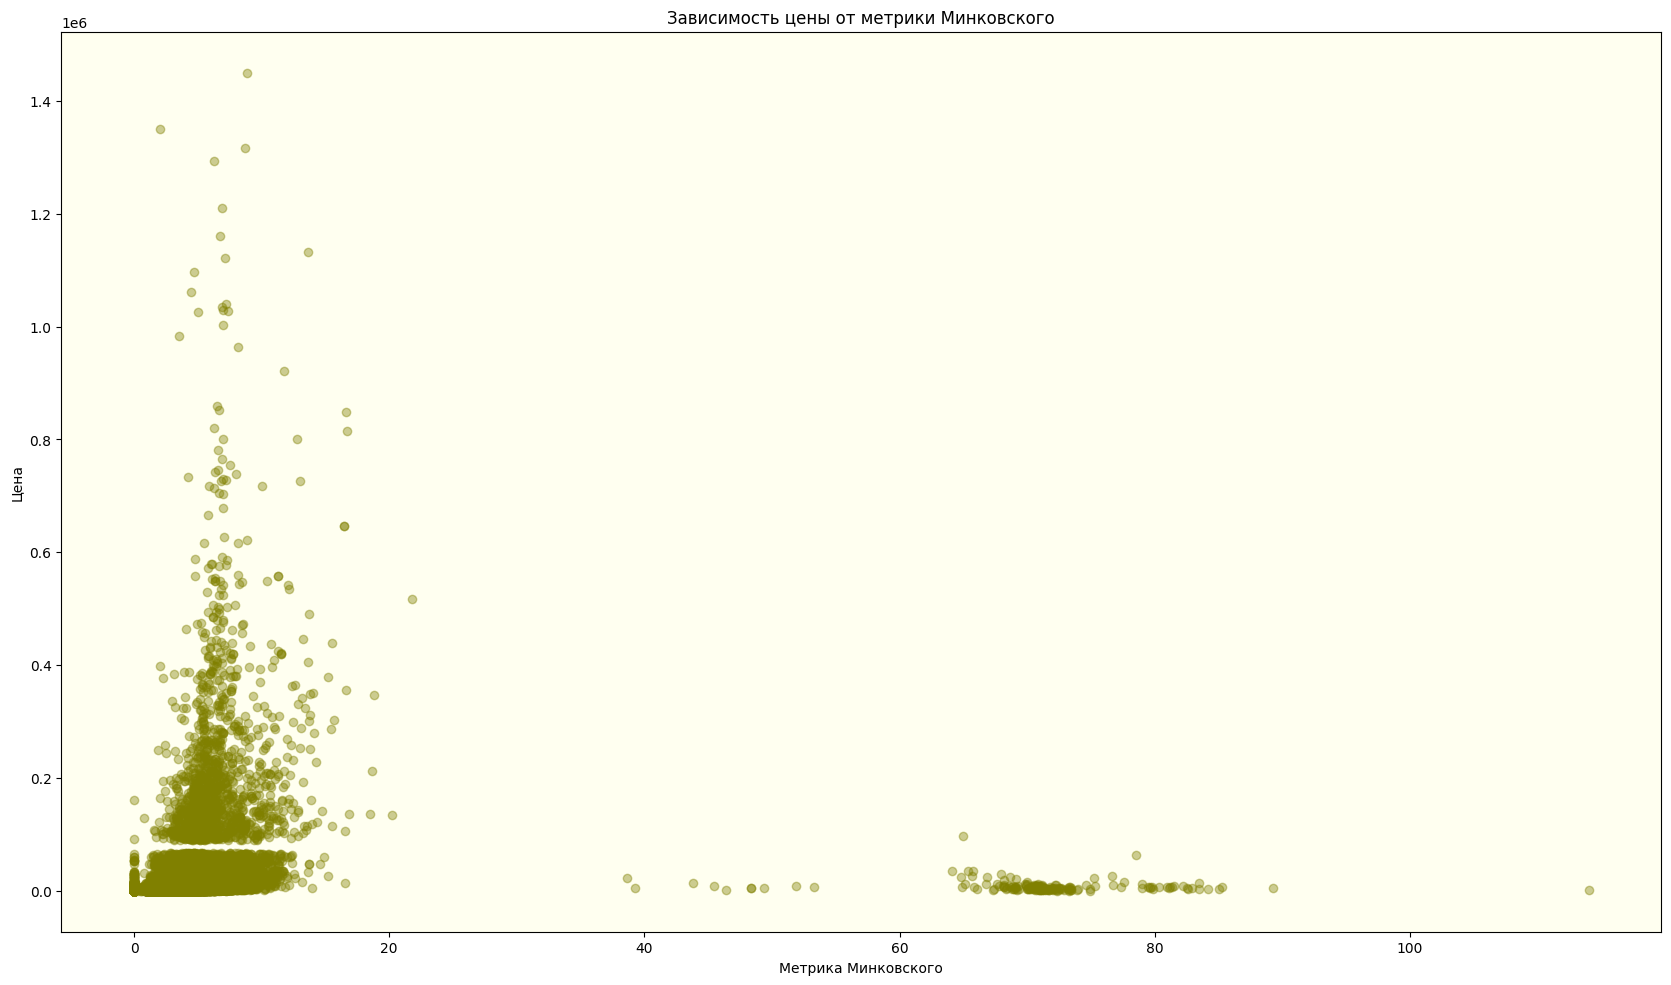

In [43]:
fig = plt.figure(
    figsize=(16, 9),
    dpi=100
)

ax = fig.add_axes([0,0,1,1], facecolor='ivory')

ax.scatter(
    training_sample["metrics"],
    training_sample["price"],
    color="olive",
    alpha=0.4
)

plt.title("Зависимость цены от метрики Минковского")
plt.xlabel("Метрика Минковского")
plt.ylabel("Цена")

plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

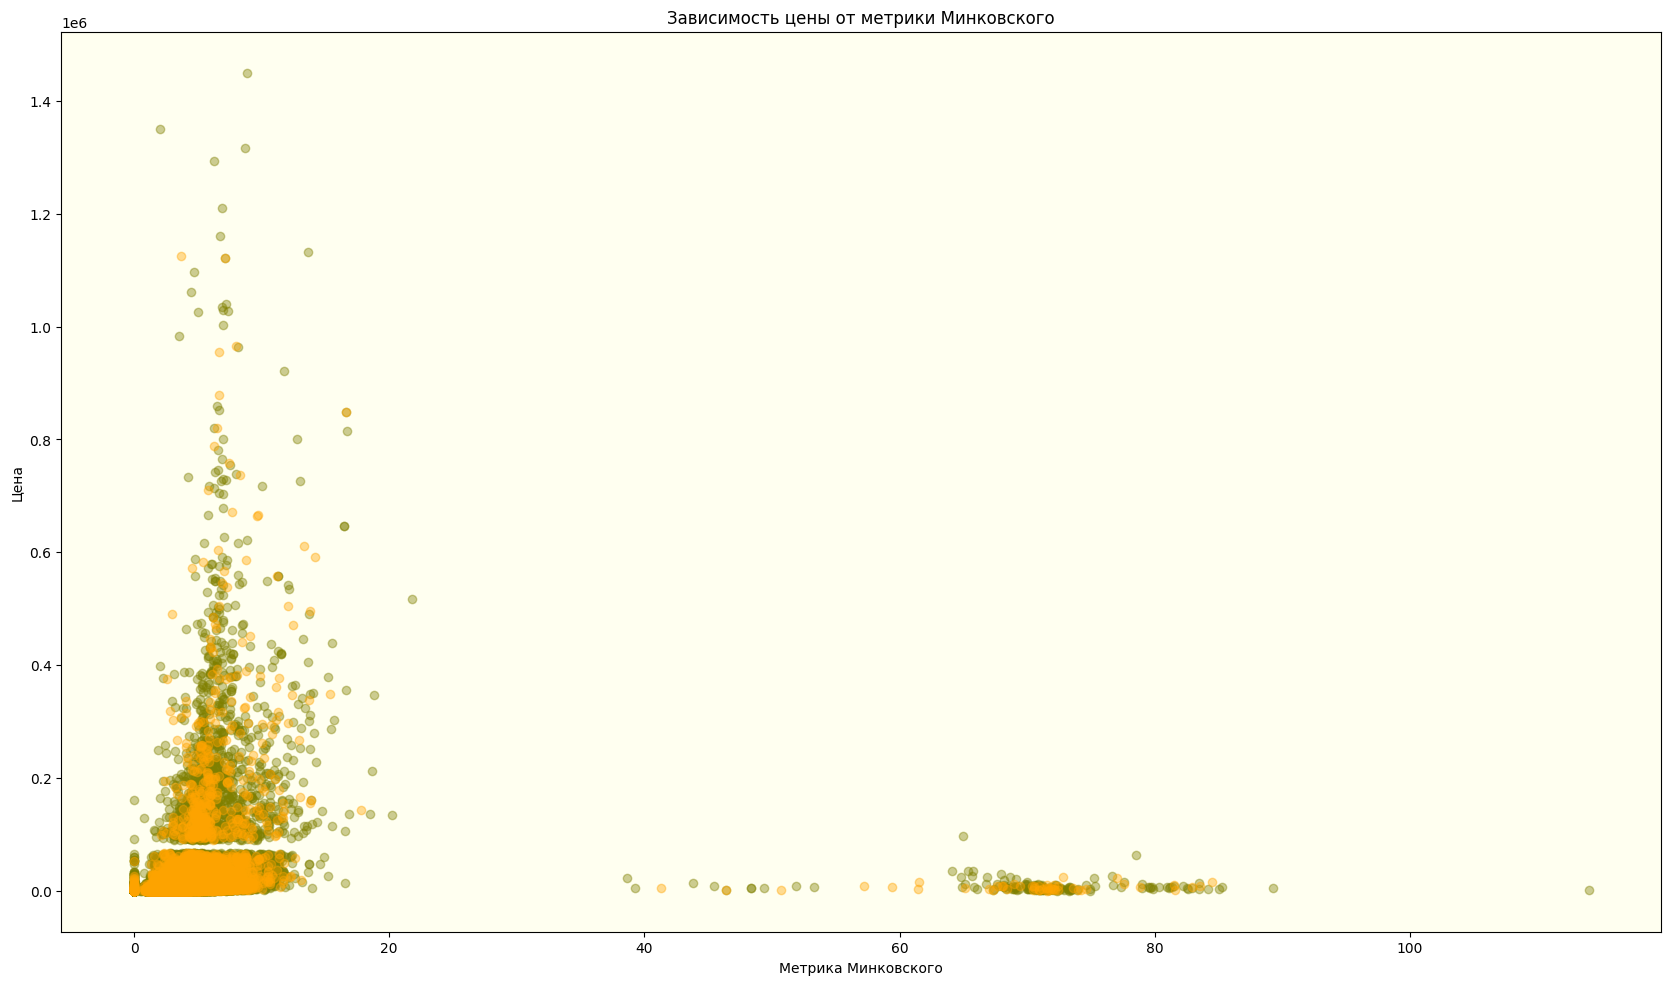

In [44]:
fig = plt.figure(
    figsize=(16, 9),
    dpi=100
)

ax = fig.add_axes([0,0,1,1], facecolor='ivory')

ax.scatter(
    training_sample["metrics"],
    training_sample["price"],
    color="olive",
    alpha=0.4
)

ax.scatter(
    test_sample["metrics"],
    test_sample["price"],
    color="orange",
    alpha=0.4
)

plt.title("Зависимость цены от метрики Минковского")
plt.xlabel("Метрика Минковского")
plt.ylabel("Цена")

plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)